# Aarav Gosalia

## Research question/interests
**Has there been a positive or negative change in literacy rates in previosly literate and non-literate countries and what could be the factors affecting it?**

Briefly describe your research question or interests here.

I will first filter out the countries which have only 1 year of data. Then I will check the first year of data collected for literacy number of different countries to classify them as previously literate or non-literate. Then I will plot two facetgrids containing literate and non-literate countries and compare literacy rates over the years and try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf
pd.options.mode.chained_assignment = None
sns.set_theme(style="ticks", font_scale=0.8)

In [4]:
data_processed = pf.data_processing("../data/raw/dataset_raw.csv")
dictionary = pf.plotting(data_processed)
lineplot(dictionary)

In [ ]:
data_plot1,data_plot2 = more_processing(dictionary)
data_plot1

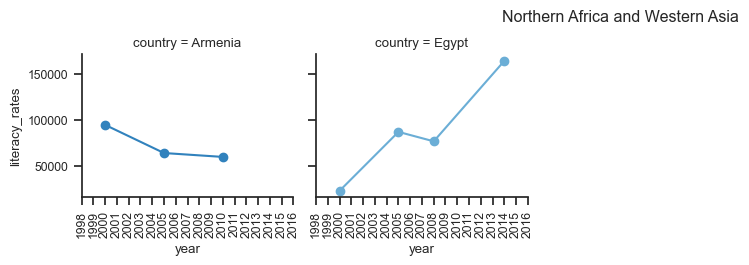

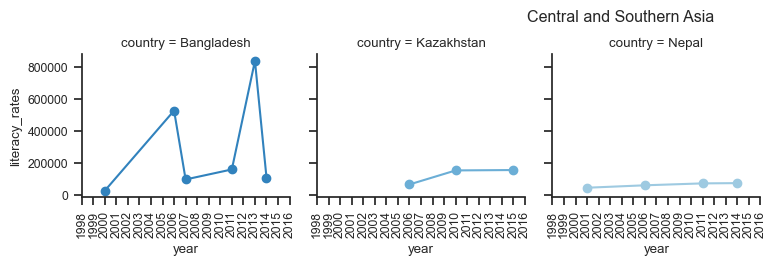

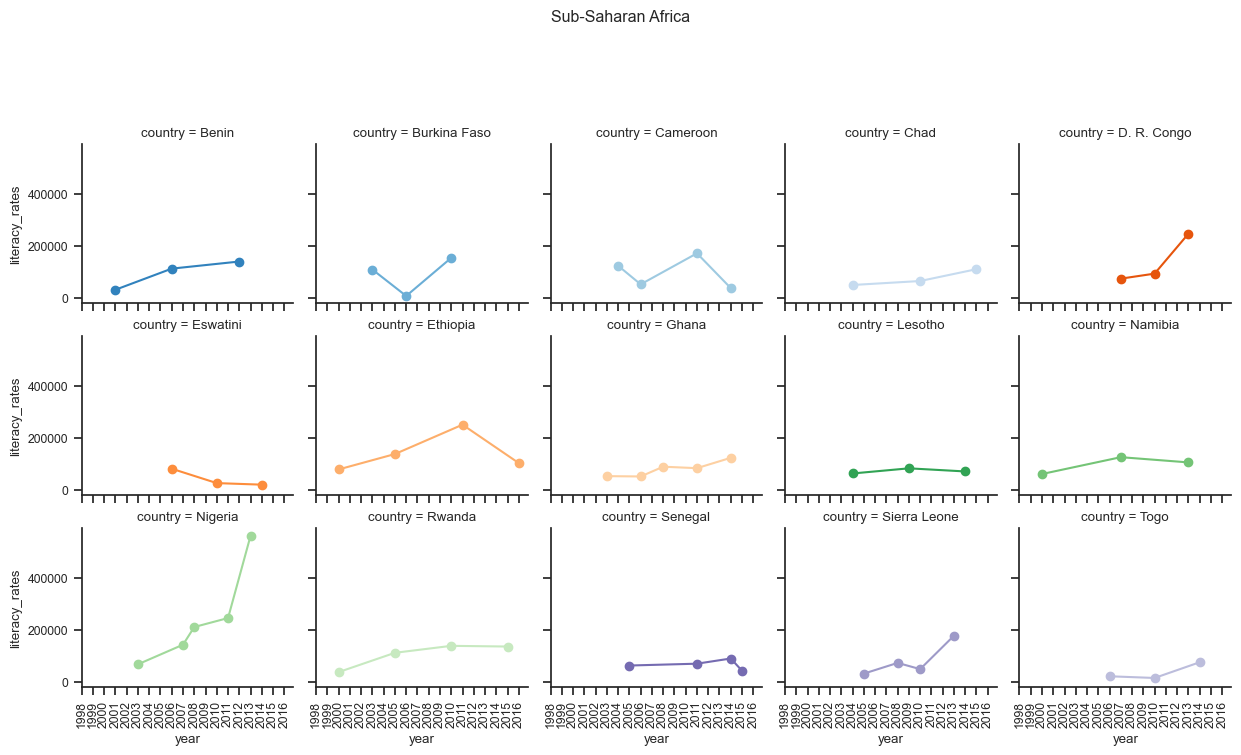

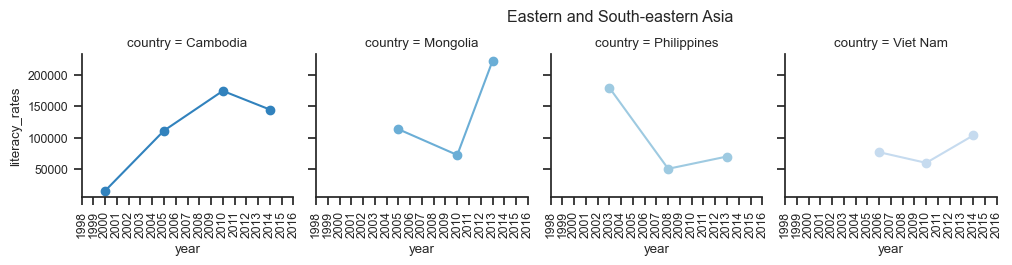

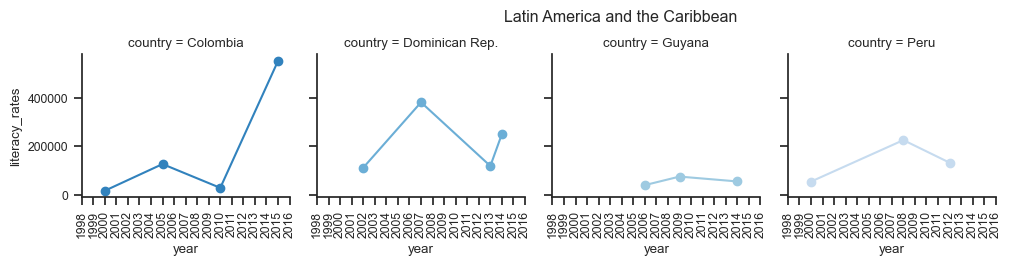

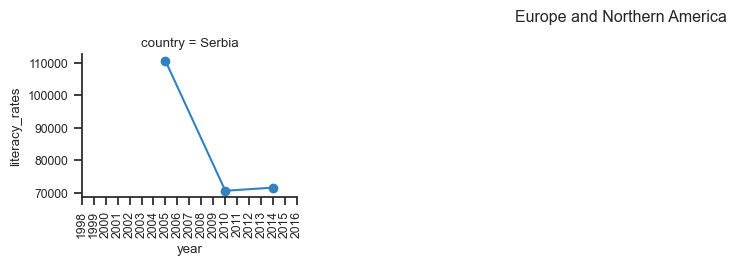

In [5]:
for i in range(6):
    grid = sns.FacetGrid(list(dictionary.values())[i], col="country", hue="country", palette="tab20c", col_wrap=5, height=2.5)
    grid.map(plt.plot, "year", "literacy_rates", marker="o")
    grid.set(xticks=np.arange(1998,2017))
    grid.set_xticklabels(np.arange(1998,2017), rotation=90)
    grid.fig.subplots_adjust(top=0.8)
    grid.fig.suptitle(list(dictionary.keys())[i])

In [26]:
data_plot1 = pd.DataFrame()
data_plot2 = pd.DataFrame()
for i in range(6):
    list(dictionary.values())[i].reset_index(drop = True, inplace = True)
    first_values = list(dictionary.values())[i].groupby(["country"]).agg({'country': 'first','year': 'min','literacy_rates': 'first',"region_group" : 'first'})
    last_values = list(dictionary.values())[i].groupby(["country"]).agg({'country': 'first','year': 'max','literacy_rates': 'last',"region_group" : 'first'})
    plot_values = first_values[["country"]]
    plot_values["percentage change"] = (last_values.literacy_rates-first_values.literacy_rates)/(first_values.literacy_rates)*100
    plot_values.reset_index(drop = True, inplace = True)
    temp = pd.DataFrame([[list(dictionary.keys())[i],plot_values["percentage change"].mean()]], columns = ["region_group","Average percentage change"])
    data_plot1 = pd.concat([data_plot1,plot_values],join="outer")
    data_plot2 = pd.concat([data_plot2,temp],join="outer")
    #create a dataframe for average percentage change based on each region and create a bar plot

In [27]:
data_plot2

,region_group,Average percentage change
0,Northern Africa and Western Asia,293.028514
0,Central and Southern Asia,175.202163
0,Sub-Saharan Africa,165.252115
0,Eastern and South-eastern Asia,224.884769
0,Latin America and the Caribbean,927.188332
0,Europe and Northern America,-35.227149


<AxesSubplot:xlabel='country', ylabel='percentage change'>

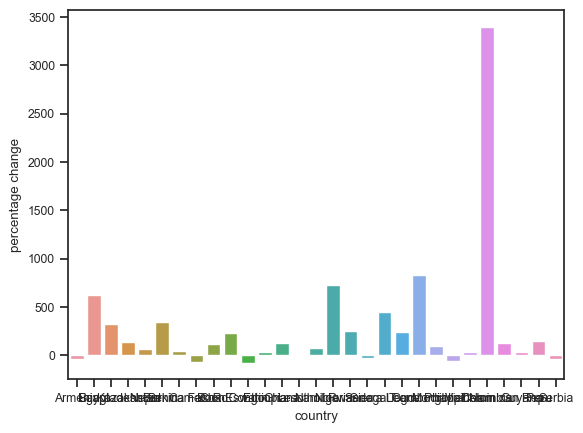

In [20]:
sns.barplot(data = data_plot1, x="country", y="percentage change")

<AxesSubplot:xlabel='region_group', ylabel='Average percentage change'>

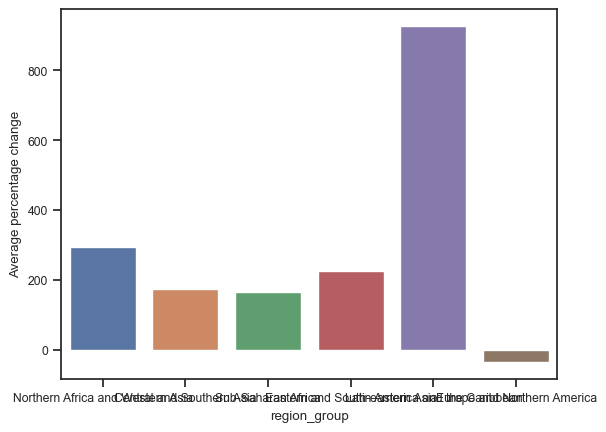

In [28]:
sns.barplot(data = data_plot2, x="region_group", y="Average percentage change")